In [60]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns



# Neural net code

In [1]:
import requests
import os
base_url = 'https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch12/'

for filename in ['neuralnet.py']:
    if not os.path.exists(filename):
        response = requests.get(base_url+filename)
        with open(filename,'wb') as f:
            f.write(response.text.encode('utf-8'))
    
from neuralnet import NeuralNetMLP

# Plots for introducing neural networks

In [61]:
colors = np.array(sns.color_palette("coolwarm", n_colors=101)[:101])
cmap = sns.color_palette("coolwarm", as_cmap=True)

Generate circular data and associated grid of points

In [73]:
# construct data
n = 200
radius_min, d = np.array([0,4]), 2
A = np.random.RandomState(0).rand(n,3)
y = (A[:,0]>.3).astype('int64')
X_radius = A[:,1]*d+radius_min[y]
X_rotate = A[:,2]*np.pi*2
X = (np.vstack([np.sin(X_rotate),np.cos(X_rotate)])*X_radius).T

# construct grid
b = 6.5 # bounds
xx, yy = np.mgrid[-b:b:.025, -b:b:.025]
grid = np.c_[xx.ravel(), yy.ravel()]
grid_values = np.linspace(0,1,len(grid)).reshape(xx.shape)

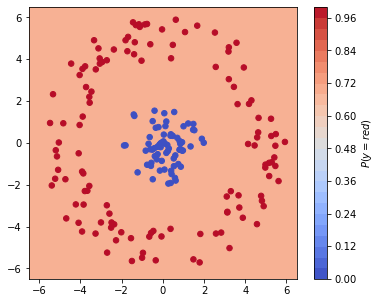

In [74]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()

f,ax = plt.subplots(1,1,figsize=[6,5])

contour = ax.contourf(xx, yy, grid_values, 25, cmap=cmap, vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = red)$")

# plot dots
y_pred = np.ones(grid.shape[0],dtype='int64')*69
ax.scatter(grid[:,0],grid[:,1],30,colors[y_pred])
ax.scatter(X[:,0],X[:,1],30,colors[y*100])
ax.set_xlim(-b,b)
ax.set_ylim(-b,b)
f.savefig('fig/neural/circle_even_likelihood.png',dpi=200)

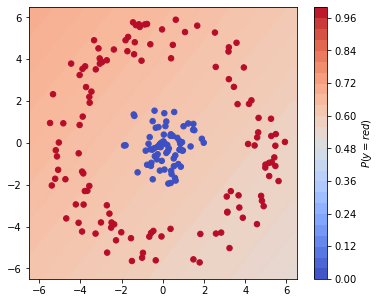

In [75]:
f,ax = plt.subplots(1,1,figsize=[6,5])

contour = ax.contourf(xx, yy, grid_values, 25, cmap=cmap, vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = red)$")

clf_lr.fit(X_c,y_c)
clf_lr.predict_proba(X_c)[:,1]
probs = clf_lr.predict_proba(grid)[:, 1]

y_pred = (probs.round(2)*100).astype(int)
ax.scatter(grid[:,0],grid[:,1],30,colors[y_pred])
ax.scatter(X_c[:,0],X_c[:,1],30,colors[y*100])
ax.set_xlim(-b,b)
ax.set_ylim(-b,b)
f.savefig('fig/neural/circle_lr_likelihood.png', dpi=200)

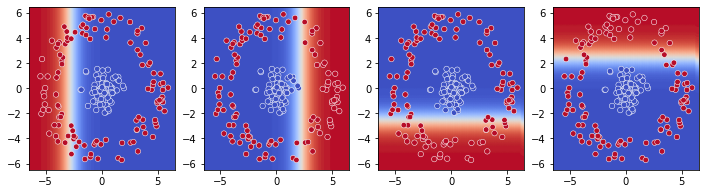

In [76]:
f,ax = plt.subplots(1,4,figsize=[12,3])

clf_lr.fit(X_c,y_c)
clf_lr.predict_proba(X_c)[:,1]

X_c_h = np.zeros([n,4])
grid_h = np.zeros([grid.shape[0],4])

lr_transform = lambda X: 1/(1+np.exp((sgn*(X[:,i]+2.5*sgn)*2)))



for k in range(4):
    i,j = k//2, k%2
    sgn = 1 if j==0 else -1


    y_pred = (lr_transform(grid).round(2)*100).astype(int)
    ax[k].scatter(grid[:,0],grid[:,1],30,colors[y_pred])
    ax[k].scatter(X_c[:,0],X_c[:,1],30,colors[y*100], edgecolor="white", linewidth=.5)

    X_c_h[:,k] = lr_transform(X_c)
    grid_h[:,k] = y_pred
    ax[k].set_xlim(-b,b)
    ax[k].set_ylim(-b,b)
    
f.savefig('fig/neural/circle_direction_likelihood.png', dpi=200)

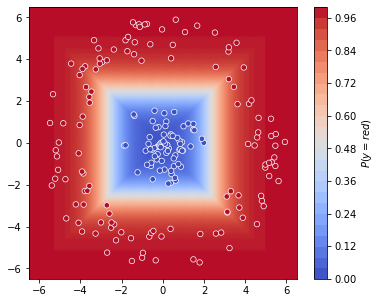

In [77]:
f,ax = plt.subplots(1,1,figsize=[6,5])

contour = ax.contourf(xx, yy, grid_values, 25, cmap=cmap, vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = red)$")

y_pred = grid_h.max(1).astype(int)
ax.scatter(grid[:,0],grid[:,1],30,colors[y_pred])
ax.scatter(X_c[:,0],X_c[:,1],30,colors[y*100], edgecolor="white", linewidth=.7)
ax.set_xlim(-b,b)
ax.set_ylim(-b,b)

f.savefig('fig/neural/circle_combine_direction_likelihood.png', dpi=200)